# Redes 2

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from redes import *

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


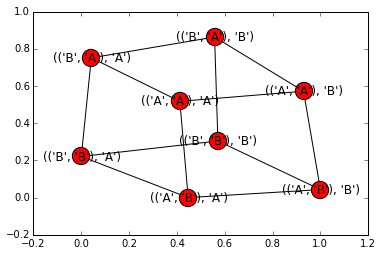

In [2]:
G1 = nx.Graph()
G1.add_edge("A", "B")
#nx.draw_networkx(G1)
G2 = nx.cartesian_product(G1, G1)
#nx.draw_networkx(G2)
G3 = nx.cartesian_product(G2, G1)
nx.draw_networkx(G3)

<Container object of 4 artists>

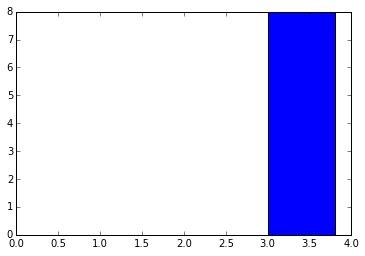

In [14]:
dh = nx.degree_histogram(G3)
plt.bar(np.arange(len(dh)), dh) #constante

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


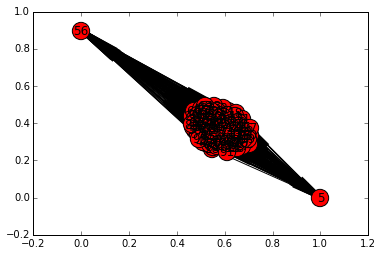

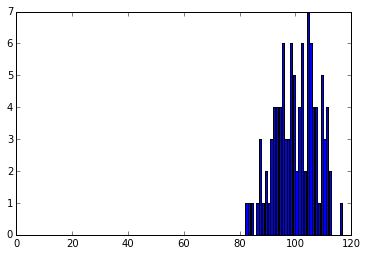

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[0, 1, 2, 4, 6, 7, 8, 9], [3, 5]]
[[0, 1, 3, 4, 5, 6, 7, 8, 9], [2]]


In [77]:
# Aleatoria
def aleat(n, p):
    "erdos-renyi de nxn nodos con prob de conexion p."
    mat = np.random.random(n*n).reshape(n,n)
    mat = np.where(mat<p, 1, 0)
    return desde(mat, digráfica=True)

RND=aleat(100, .5)
nx.draw_networkx(RND)
plt.show()
dh = nx.degree_histogram(RND)
plt.bar(np.arange(len(dh)), dh) #normal
plt.show()

print(list(nx.connected_components(aleat(10,.5).to_undirected())))
print(list(nx.connected_components(aleat(10,.3).to_undirected())))
print(list(nx.connected_components(aleat(10,.2).to_undirected())))
print(list(nx.connected_components(aleat(10,.1).to_undirected())))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


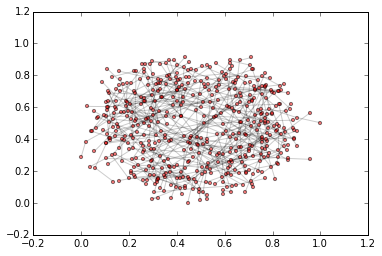

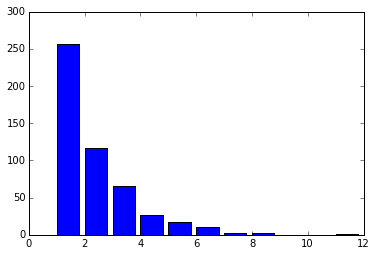

In [21]:
# Otra forma de crear una red aleatoria, saludo
n=500

SA=nx.Graph()
SA.add_node(0)
aristas= ((i, np.random.randint(0, i)) for i in range(1, n)) # i + uno ya creado 
SA.add_edges_from(aristas)
pos = nx.spring_layout(SA, iterations=10) # posición de nodos
nx.draw_networkx_nodes(SA, pos, node_size=10, alpha=0.5)
nx.draw_networkx_edges(SA, pos, alpha=.2)
plt.show()
#imprime_lista_de_adyacencia(G)
dh = nx.degree_histogram(SA)
plt.bar(np.arange(len(dh)), dh) # exponencial negativa
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


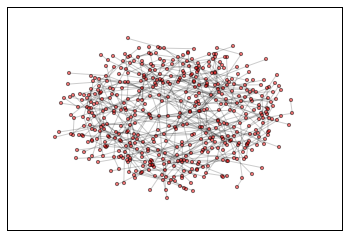

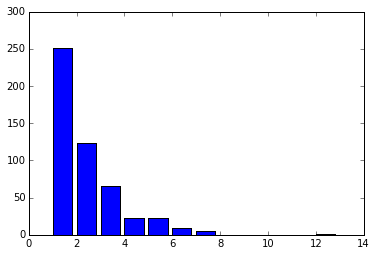

In [22]:
n = 500

BA=nx.Graph()
BA.add_node(0)
aristas= ((i, np.random.randint(0, i)) for j in range(np.random.randint(1,3)) for i in range(1, n)) # i + uno ya creado 
BA.add_edges_from(aristas)
pos = nx.spring_layout(BA, iterations=10) # posición de nodos
nx.draw_networkx_nodes(BA, pos, node_size=10, alpha=0.5)
nx.draw_networkx_edges(BA, pos, alpha=.2)
plt.xticks([])
plt.yticks([])
plt.show()
#imprime_lista_de_adyacencia(G)
dh = nx.degree_histogram(BA)
plt.bar(np.arange(len(dh)), dh) #ley de potencias
plt.show()

In [26]:
nx.density(G3)

0.42857142857142855

In [28]:
print(nx.info(G3))

Name: Cartesian product(Cartesian product(,),)
Type: Graph
Number of nodes: 8
Number of edges: 12
Average degree:   3.0000


In [29]:
print(nx.info(BA))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 499
Average degree:   1.9960


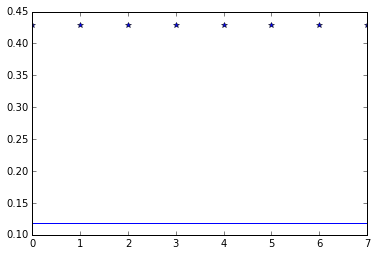

In [50]:
plt.plot(list(nx.degree_centrality(G3).values()), "b*")
plt.plot(list(nx.betweenness_centrality(G3).values()), "-")

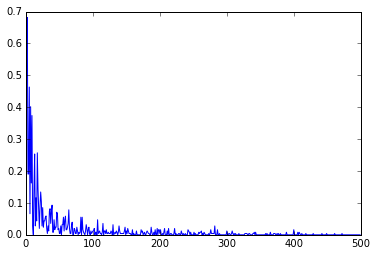

In [51]:
plt.plot(list(nx.betweenness_centrality(SA).values()), "-")

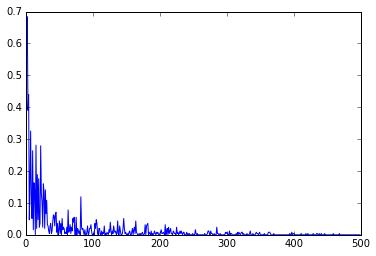

In [49]:
# betweenness - nodos importantes son por los que pasan muchas rutas
plt.plot(list(nx.betweenness_centrality(BA).values()), "-")